# Global food price analysis

***Import important libraries***

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes

***Import, clean and reorganise data***

In [14]:
df = pd.read_csv("/content/FAOFP1990_2022.csv")

In [15]:
df.head

<bound method NDFrame.head of     Date Food.Price.Index Meat Dairy Cereals Oils Sugar
0        1 "01/01/1990" 64.1 73.4 53.5 64.1 44.59 87.9 
1           2 "01/02/1990" 64.5 76 52.2 62.2 44.5 90.7 
2        3 "01/03/1990" 63.8 77.8 41.4 61.3 45.75 95.1 
3        4 "01/04/1990" 65.8 80.4 48.4 62.8 44.02 94.3 
4             5 "01/05/1990" 64.4 81 39.2 62 45.5 90.4 
..                                                 ... 
385  386 "01/04/2022" 158.4 121.9 146.7 169.7 237.5... 
386  387 "01/05/2022" 158.1 122.9 144.2 173.5 229.2... 
387  388 "01/06/2022" 154.7 125.9 150.2 166.3 211.8... 
388  389 "01/07/2022" 140.7 124.6 146.5 147.3 168.8... 
389  390 "01/08/2022" 138 122.7 143.5 145.2 163.3 1... 

[390 rows x 1 columns]>

In [16]:
df[["Number", "Date", "Index", "Meat", "Dairy", "Cereals", "Oils", "Sugar"]] = df["Date Food.Price.Index Meat Dairy Cereals Oils Sugar"].str.split(" ", expand = True)

In [17]:
df.head()

,Date Food.Price.Index Meat Dairy Cereals Oils Sugar,Number,Date,Index,Meat,Dairy,Cereals,Oils,Sugar
0,"1 ""01/01/1990"" 64.1 73.4 53.5 64.1 44.59 87.9",1,"""01/01/1990""",64.1,73.4,53.5,64.1,44.59,87.9
1,"2 ""01/02/1990"" 64.5 76 52.2 62.2 44.5 90.7",2,"""01/02/1990""",64.5,76,52.2,62.2,44.5,90.7
2,"3 ""01/03/1990"" 63.8 77.8 41.4 61.3 45.75 95.1",3,"""01/03/1990""",63.8,77.8,41.4,61.3,45.75,95.1
3,"4 ""01/04/1990"" 65.8 80.4 48.4 62.8 44.02 94.3",4,"""01/04/1990""",65.8,80.4,48.4,62.8,44.02,94.3
4,"5 ""01/05/1990"" 64.4 81 39.2 62 45.5 90.4",5,"""01/05/1990""",64.4,81,39.2,62,45.5,90.4


In [18]:
df["Date"] = df["Date"].str.replace("\"", "")
df['Date'] = df.Date.astype(str)

In [19]:
df[["Day", "Month", "Year"]] = df["Date"].str.split("/", expand = True)

In [20]:
df.head()

,Date Food.Price.Index Meat Dairy Cereals Oils Sugar,Number,Date,Index,Meat,Dairy,Cereals,Oils,Sugar,Day,Month,Year
0,"1 ""01/01/1990"" 64.1 73.4 53.5 64.1 44.59 87.9",1,01/01/1990,64.1,73.4,53.5,64.1,44.59,87.9,01,01,1990
1,"2 ""01/02/1990"" 64.5 76 52.2 62.2 44.5 90.7",2,01/02/1990,64.5,76,52.2,62.2,44.5,90.7,01,02,1990
2,"3 ""01/03/1990"" 63.8 77.8 41.4 61.3 45.75 95.1",3,01/03/1990,63.8,77.8,41.4,61.3,45.75,95.1,01,03,1990
3,"4 ""01/04/1990"" 65.8 80.4 48.4 62.8 44.02 94.3",4,01/04/1990,65.8,80.4,48.4,62.8,44.02,94.3,01,04,1990
4,"5 ""01/05/1990"" 64.4 81 39.2 62 45.5 90.4",5,01/05/1990,64.4,81,39.2,62,45.5,90.4,01,05,1990


In [21]:
df.drop(['Date', "Day", "Month", "Date Food.Price.Index Meat Dairy Cereals Oils Sugar", 'Number'], axis = 1, inplace = True)
df.head()

,Index,Meat,Dairy,Cereals,Oils,Sugar,Year
0,64.1,73.4,53.5,64.1,44.59,87.9,1990
1,64.5,76,52.2,62.2,44.5,90.7,1990
2,63.8,77.8,41.4,61.3,45.75,95.1,1990
3,65.8,80.4,48.4,62.8,44.02,94.3,1990
4,64.4,81,39.2,62,45.5,90.4,1990


In [22]:
cat_goes = ['Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']

for i in cat_goes :
    df[i] = df[i].astype(float)

df["Year"] = df.Year.astype(int)
df.dtypes

Index      float64
Meat       float64
Dairy      float64
Cereals    float64
Oils       float64
Sugar      float64
Year         int64
dtype: object

In [23]:
df.head()

,Index,Meat,Dairy,Cereals,Oils,Sugar,Year
0,64.1,73.4,53.5,64.1,44.59,87.9,1990
1,64.5,76.0,52.2,62.2,44.50,90.7,1990
2,63.8,77.8,41.4,61.3,45.75,95.1,1990
3,65.8,80.4,48.4,62.8,44.02,94.3,1990
4,64.4,81.0,39.2,62.0,45.50,90.4,1990


***Simplifying data to yearly mean***

In [24]:
df = df.groupby(['Year']).mean()

In [25]:
df.head()

,Index,Meat,Dairy,Cereals,Oils,Sugar
Year,,,,,,
1990,63.016667,81.550000,42.616667,58.083333,45.471667,77.700000
1991,62.058333,80.633333,45.466667,57.866667,49.007500,55.483333
1992,63.925000,77.516667,54.800000,60.958333,52.993333,56.025000
1993,61.933333,74.066667,48.608333,59.025000,53.965833,62.025000
1994,66.933333,75.333333,47.408333,61.933333,71.867500,74.950000


***Visualise data in simpler form***

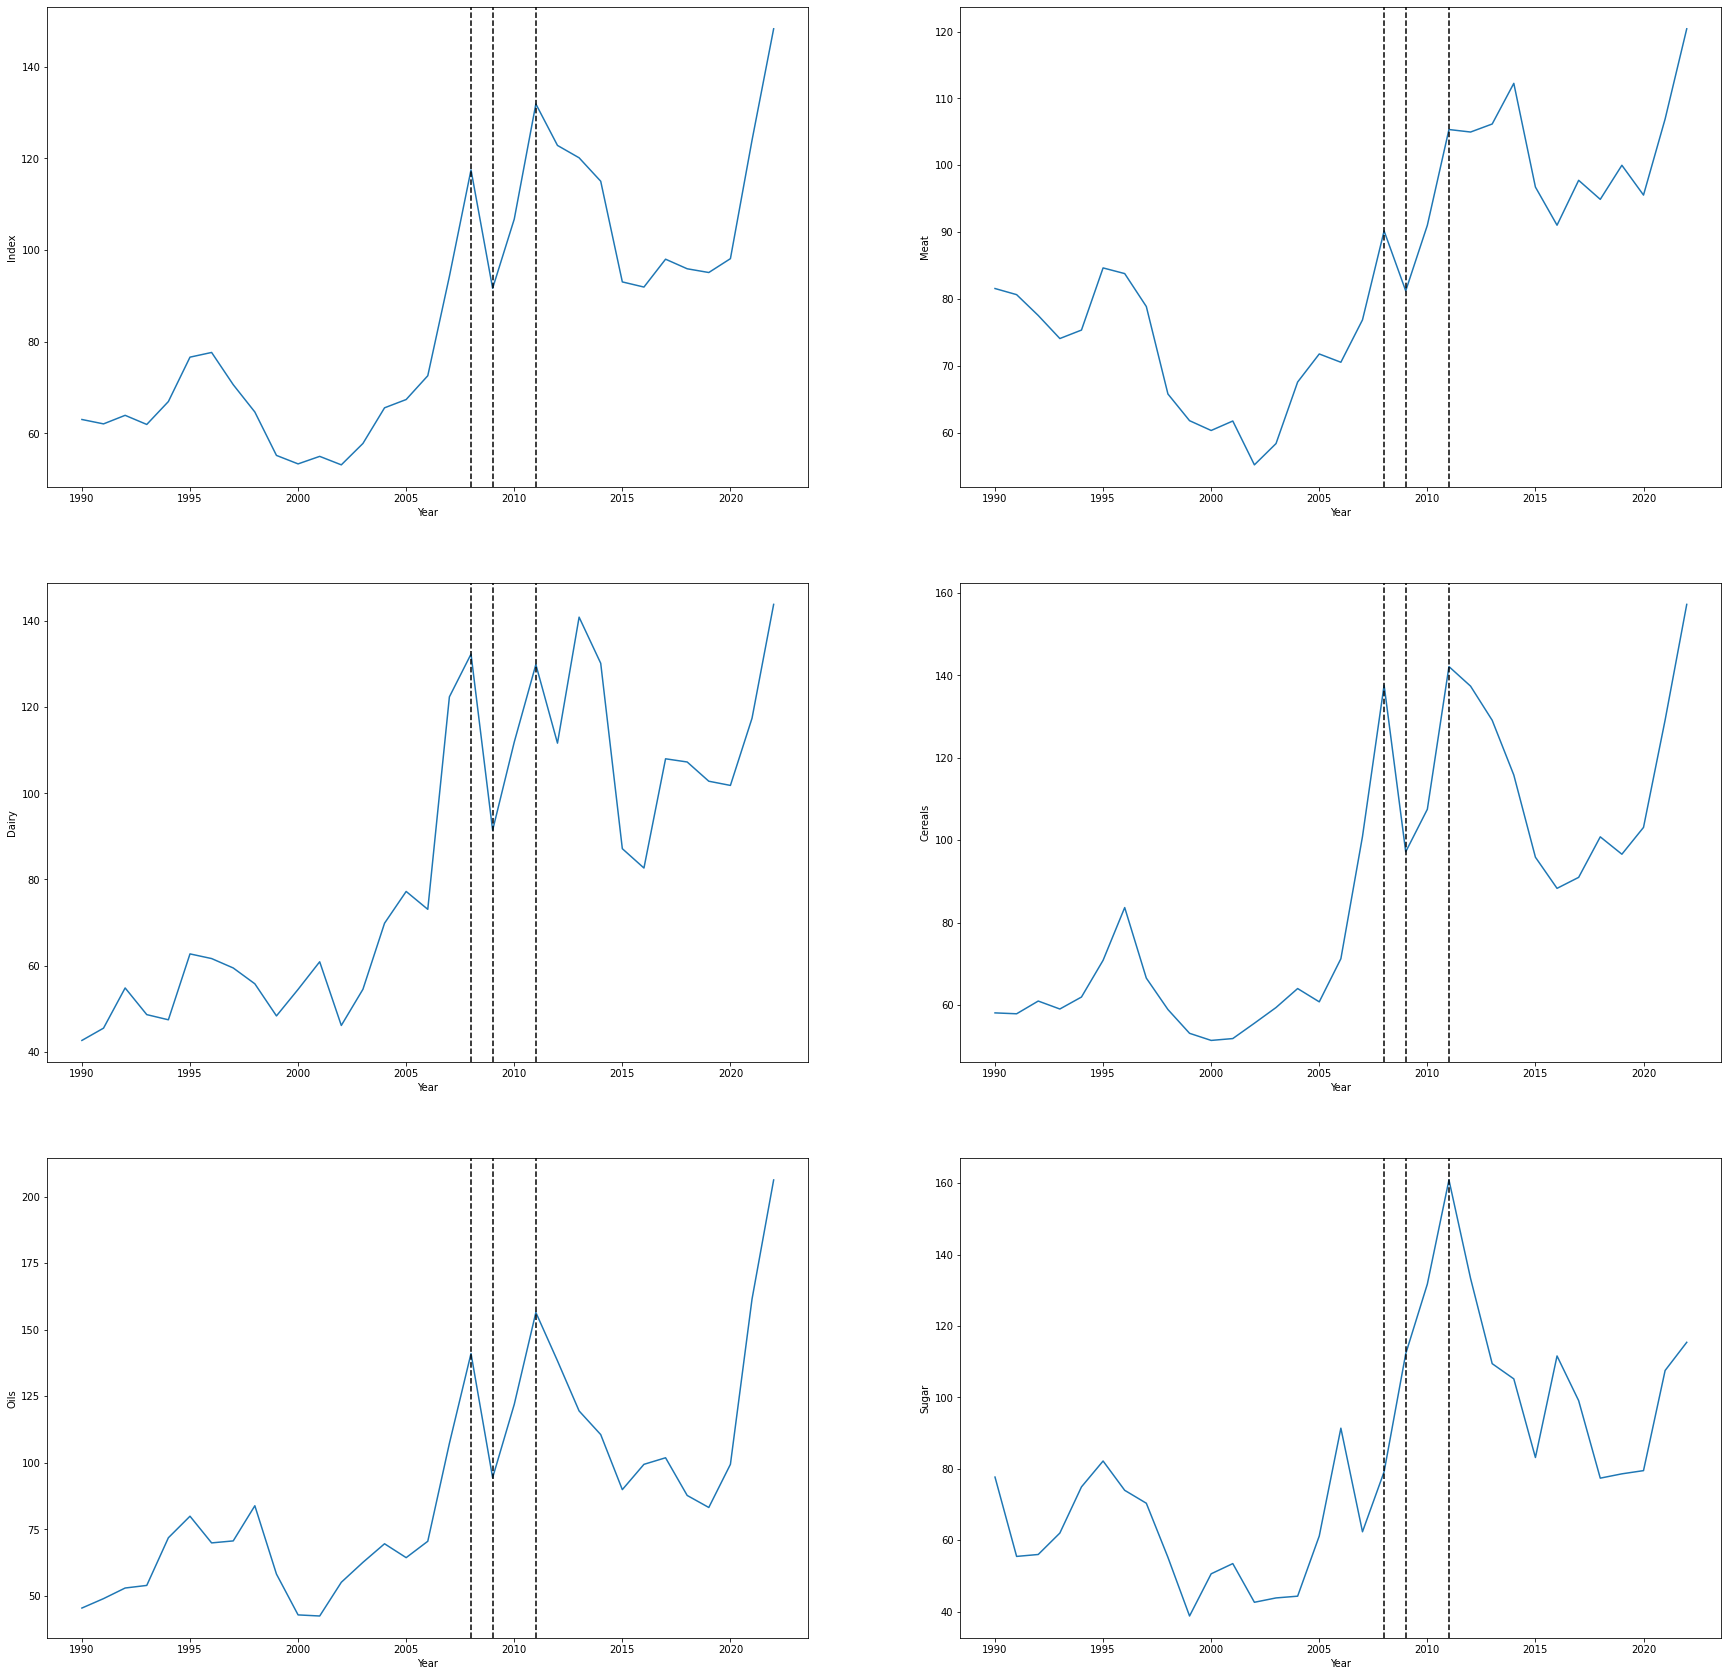

In [26]:
f, axes = plt.subplots(ncols = 2, nrows=3, figsize = (30, 30))

sns.lineplot(data = df, x="Year", y="Index", ax=axes[0,0])
sns.lineplot(data = df, x="Year", y="Meat", ax=axes[0,1])
sns.lineplot(data = df, x="Year", y="Dairy", ax=axes[1,0])
sns.lineplot(data = df, x="Year", y="Cereals", ax=axes[1,1])
sns.lineplot(data = df, x="Year", y="Oils", ax=axes[2,0])
sns.lineplot(data = df, x="Year", y="Sugar", ax=axes[2,1])

years = [2008, 2009, 2011]

for i in years :
    axes[0,0].axvline(x = i, color = 'k', linestyle = '--')
    axes[0,1].axvline(x = i, color = 'k', linestyle = '--')
    axes[1,0].axvline(x = i, color = 'k', linestyle = '--')
    axes[1,1].axvline(x = i, color = 'k', linestyle = '--')
    axes[2,0].axvline(x = i, color = 'k', linestyle = '--')
    axes[2,1].axvline(x = i, color = 'k', linestyle = '--')

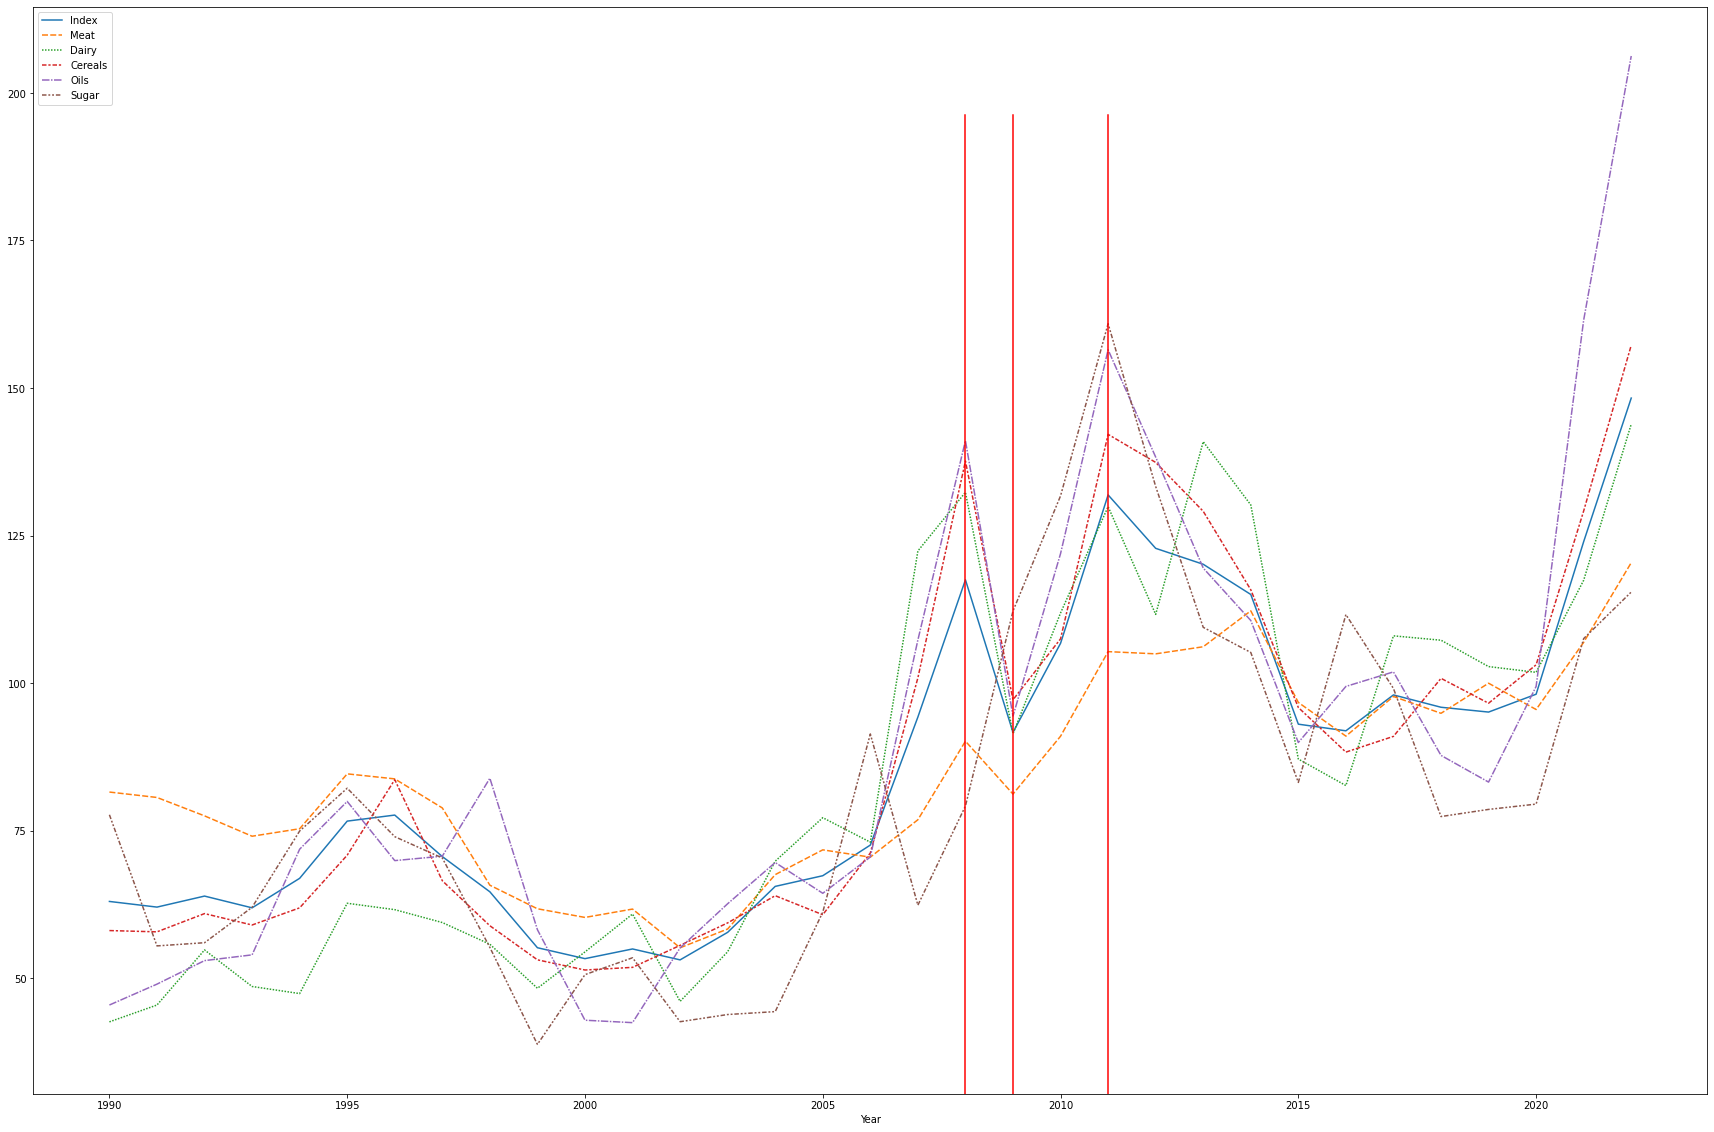

In [27]:
dims = (30, 20)
fig, axes = plt.subplots(figsize = dims)

sns.lineplot(data = df[["Index", "Meat", "Dairy", "Cereals", "Oils", "Sugar"]], ax = axes)

years = [2008, 2009, 2011]

for i in years :
    axes.axvline(x = i, color = 'r', ymax = 0.9)

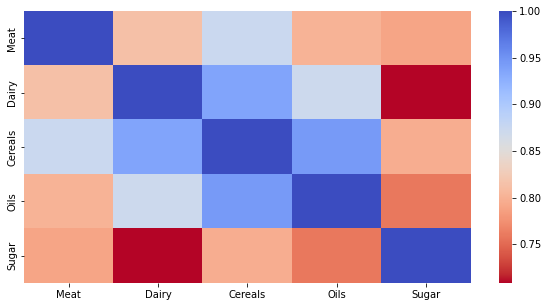

In [28]:
dims = (10, 5)
fig, axes = plt.subplots(figsize = dims)

corr = df[["Meat", "Dairy", "Cereals", "Oils", "Sugar"]].corr()
sns.heatmap(corr, cmap = "coolwarm_r", annot_kws = {"size" : 40}, ax = axes)

In [29]:
corr

,Meat,Dairy,Cereals,Oils,Sugar
Meat,1.000000,0.813724,0.874205,0.801470,0.789962
Dairy,0.813724,1.000000,0.936739,0.871379,0.708545
Cereals,0.874205,0.936739,1.000000,0.944335,0.796278
Oils,0.801470,0.871379,0.944335,1.000000,0.759762
Sugar,0.789962,0.708545,0.796278,0.759762,1.000000


The higher the correlation, the higher the elasticity

***Yearly food price change***

***Analysing regression of prices index***

In [30]:
(df.pct_change().style.highlight_max(color="#A5191E").highlight_min(color="#356518").format("{:.2%}", na_rep="-"))

,Index,Meat,Dairy,Cereals,Oils,Sugar
Year,,,,,,
1990,-,-,-,-,-,-
1991,-1.52%,-1.12%,6.69%,-0.37%,7.78%,-28.59%
1992,3.01%,-3.87%,20.53%,5.34%,8.13%,0.98%
1993,-3.12%,-4.45%,-11.30%,-3.17%,1.84%,10.71%
1994,8.07%,1.71%,-2.47%,4.93%,33.17%,20.84%
1995,14.48%,12.35%,32.27%,14.40%,11.26%,9.67%
1996,1.34%,-1.00%,-1.73%,18.07%,-12.54%,-9.99%
1997,-9.06%,-5.88%,-3.54%,-20.47%,1.07%,-4.89%
1998,-8.45%,-16.60%,-6.18%,-11.46%,18.68%,-21.53%
